In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_excel('Linear Regression.xlsx')

In [4]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [5]:
data.tail()

,price,sqft_living,bedrooms,bathrooms,floors
21608,360000,1530,3,2.50,3.0
21609,400000,2310,4,2.50,2.0
21610,402101,1020,2,0.75,2.0
21611,400000,1600,3,2.50,2.0
21612,325000,1020,2,0.75,2.0


In [6]:
data.dtypes

price            int64
sqft_living      int64
bedrooms         int64
bathrooms      float64
floors         float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [8]:
data.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


# EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D7FBFC748>,
      dtype=object)

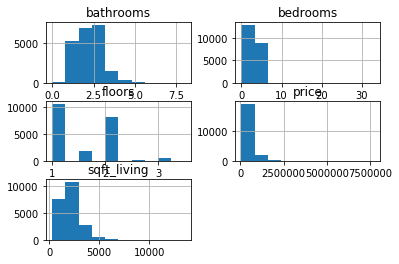

In [9]:
data.hist()

In [10]:
data.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


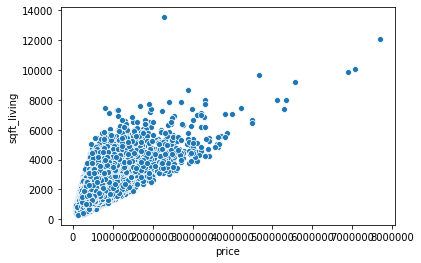

In [12]:
sns.scatterplot(data['price'],data['sqft_living'])

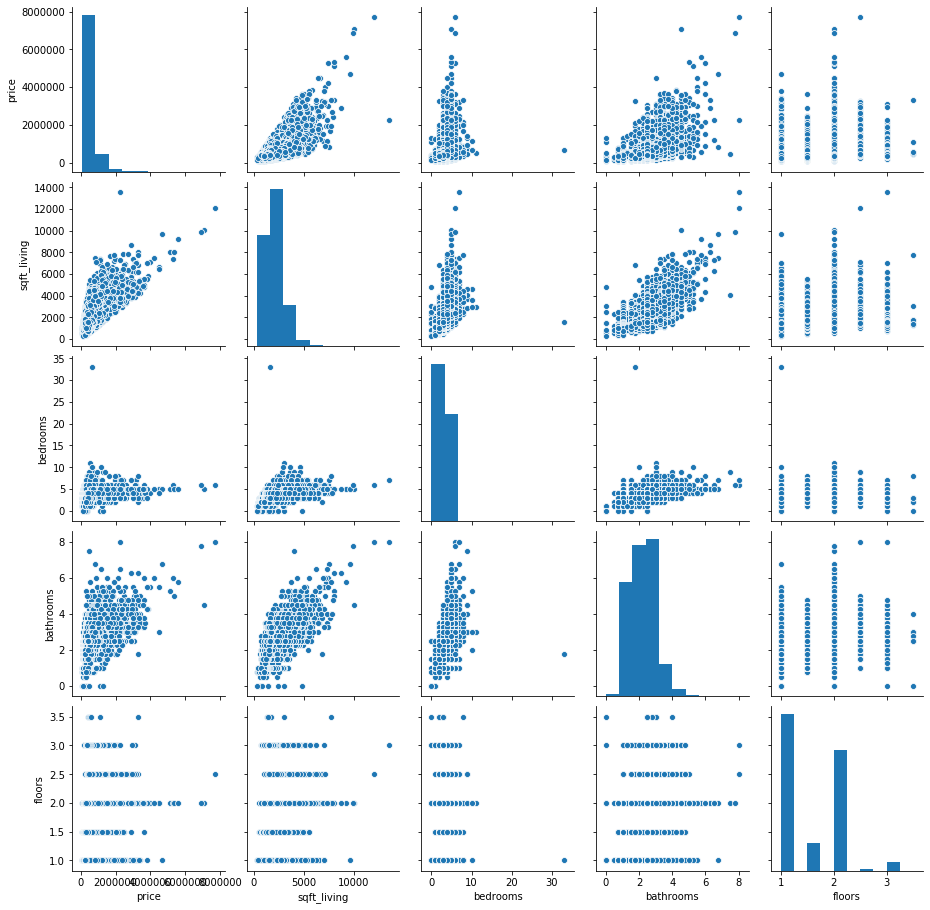

In [13]:
sns.pairplot(data)

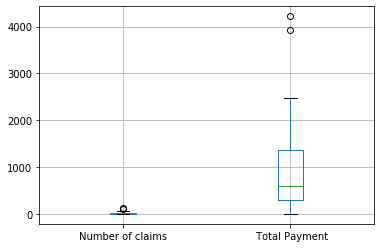

In [16]:
data.boxplot()

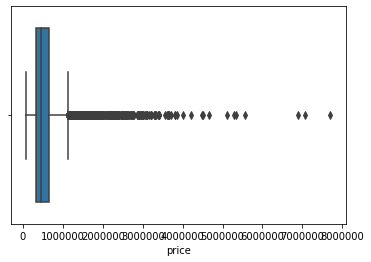

In [15]:
sns.boxplot(data['price'])

# Price and Area

In [16]:
data.head(1)

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.0,1.0


In [17]:
x=data.iloc[:,:1]

In [18]:
x.head(1)

,price
0,221900


In [39]:
y=data.iloc[:,1:2]

In [40]:
y.head(1)

,sqft_living
0,1180


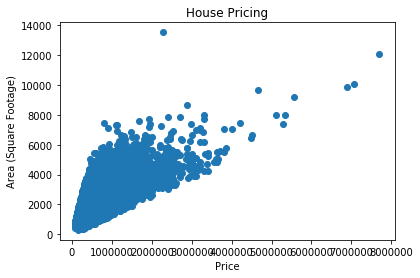

In [41]:
# Visualise dataset
plt.scatter(x, y)
plt.title('House Pricing')
plt.xlabel('Price')
plt.ylabel('Area (Square Footage)')
plt.show()

# Split the records for training & testing

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [43]:
data.shape

(21613, 5)

In [44]:
X_train.shape

(17290, 1)

In [45]:
X_test.shape

(4323, 1)

In [46]:
y_train.shape

(17290, 1)

In [47]:
y_test.shape

(4323, 1)

# Model Building with sklearn

In [48]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()


# Train the model

In [49]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
lin_reg.coef_

array([[0.00174633]])

In [51]:
lin_reg.intercept_

array([1131.43277126])

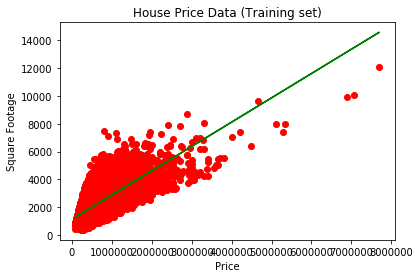

In [52]:
 #Visualise Training set result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'green')
plt.title('House Price Data (Training set)')
plt.xlabel('Price')
plt.ylabel('Square Footage')
plt.show()


# Test the model

In [53]:
ypred=lin_reg.predict(X_test)
ypred

array([[2414.98599378],
       [3139.71332351],
       [1743.52175697],
       ...,
       [1825.51199343],
       [1786.30686438],
       [1494.66960158]])

In [54]:
X_test.head()

,price
6638,735000
7366,1150000
3158,350500
9117,860000
3392,122000


In [55]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


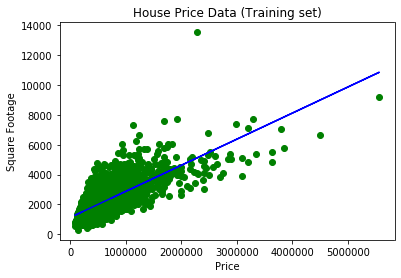

In [56]:
# Visualise Test set result
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test,lin_reg.predict(X_test), color = 'blue')
plt.title('House Price Data (Training set)')
plt.xlabel('Price')
plt.ylabel('Square Footage')
plt.show()


# estimate the price

In [57]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.5022021804710803
The RMSE value is........ 666.5368304302992


In [58]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


# Price and Bedroom

In [60]:
x=data.iloc[:,:1]
x.head(1)

,price
0,221900


In [61]:
y=data.iloc[:,2:3]
y.head(1)

,bedrooms
0,3


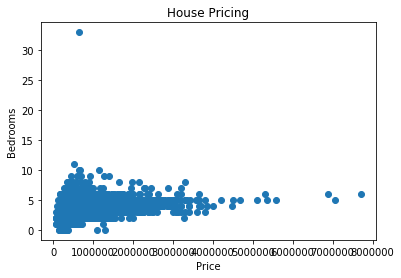

In [62]:
# Visualise dataset
plt.scatter(x, y)
plt.title('House Pricing')
plt.xlabel('Price')
plt.ylabel('Bedrooms')
plt.show()

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [66]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

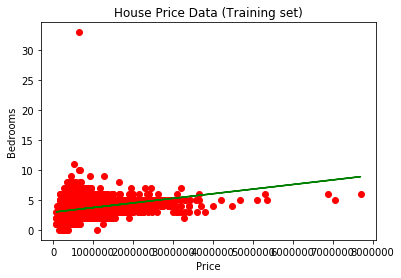

In [67]:
#Visualise Training set result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'green')
plt.title('House Price Data (Training set)')
plt.xlabel('Price')
plt.ylabel('Bedrooms')
plt.show()

In [68]:
ypred=lin_reg.predict(X_test)
ypred

array([[3.51665652],
       [3.83625865],
       [3.22054321],
       ...,
       [3.25670061],
       [3.23941129],
       [3.11080031]])

In [69]:
X_test.head()

,price
6638,735000
7366,1150000
3158,350500
9117,860000
3392,122000


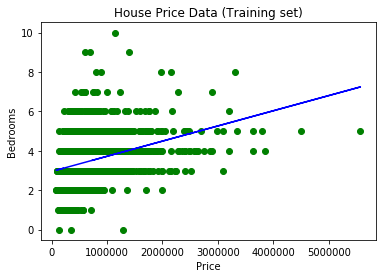

In [70]:
# Visualise Test set result
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test,lin_reg.predict(X_test), color = 'blue')
plt.title('House Price Data (Training set)')
plt.xlabel('Price')
plt.ylabel('Bedrooms')
plt.show()

In [71]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.10933217805863649
The RMSE value is........ 0.8736548931683022
